In [76]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151975 sha256=06ad3d79701a9bc31e599ec79ab81dbbed80a35e7881d326aef2b4c6d10ee021
  Stored in directory: /Users/hitteshkumarm/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [28]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hitteshkumarm/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hitteshkumarm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
train_path = "/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt"
test_path = "/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt"
test_sol_path = "/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data_solution.txt"
description_path = "/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/description.txt"

In [3]:
def read_txt_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()
    return content

In [4]:
description = read_txt_file(description_path)
print(description)

Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


In [5]:
train_df = pd.read_csv(train_path, sep=':::', header=None, engine='python')
train_df.columns = ['Id','Title','Genre','Description']

print(train_df.info())
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [6]:
test_df = pd.read_csv(test_path, sep=':::', header=None, engine='python')
test_df.columns = ['Id','Title','Description']

print(test_df.info())
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>


Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [7]:
test_sol_df = pd.read_csv(test_sol_path, sep=':::', header=None, engine='python')
test_sol_df.columns = ['Id','Title','Genre','Description']

print(test_sol_df.info())
print(type(test_sol_df))
test_sol_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


Id                          Title          Genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
test_sol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
train_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [12]:
test_df.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [13]:
test_sol_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [14]:
output_categories = train_df.Genre.unique()
print(len(output_categories))
output_categories

27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [15]:
genres = train_df.Genre
print(genres)

0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


In [16]:
le = LabelEncoder()
le.fit(genres)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [17]:
genres = le.transform(genres)
genres

array([ 8, 24,  1, ...,  7,  5, 12])

In [18]:
train_df['Labeled_Genre'] = genres

In [19]:
train_df.head(10)

Id                               Title          Genre  \
0   1       Oscar et la dame rose (2009)          drama    
1   2                       Cupid (1997)       thriller    
2   3   Young, Wild and Wonderful (1980)          adult    
3   4              The Secret Sin (1915)          drama    
4   5             The Unrecovered (2007)          drama    
5   6             Quality Control (2011)    documentary    
6   7                 "Pink Slip" (2009)         comedy    
7   8               One Step Away (1985)          crime    
8   9           "Desperate Hours" (2016)     reality-tv    
9  10                   Spirits (2014/I)         horror    

                                         Description  Labeled_Genre  
0   Listening in to a conversation between his do...              8  
1   A brother and sister with a past incestuous r...             24  
2   As the bus empties the students for their fie...              1  
3   To help their unemployed father make ends mee...              8  
4   The film's title refers not only to the un-re...              8  
5   Quality Control consists of a series of 16mm ...              7  
6   In tough economic times Max and Joey have all...              5  
7   Ron Petrie (Keanu Reeves) is a troubled teen ...              6  
8   A sudden calamitous event, causing great loss...             18  
9   Four high school students embark on a terrify...             13

In [20]:
train_df['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

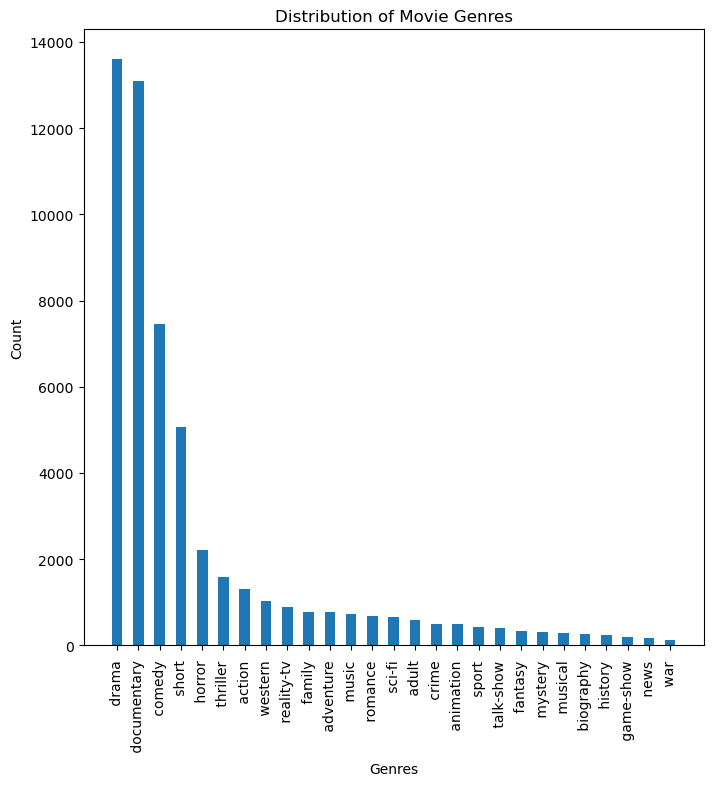

In [21]:
plt.figure(figsize=(8, 8))
values = train_df['Genre'].value_counts()
labels = values.index

plt.bar(labels, values, width=0.5, align='center')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)  

plt.show()

In [22]:
desc = train_df['Description']
for _ in range(5):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.


 As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic 

In [23]:
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Initialize stopwords and lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Remove numbers, lowercase words, remove stopwords, and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in STOPWORDS]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hitteshkumarm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hitteshkumarm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
corpus = []
ps = PorterStemmer()

for i in range(0, train_df.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= train_df['Description'][i])
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [ps.stem(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)

In [25]:
corpus[:5]

['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
 'brother sister past incestu relationship current murder relationship murder women reject murder women get close',
 'bu empti student field trip museum natur histori littl tour guid suspect student anoth tour first lectur film co drift dream erot fantasi one imagin film releas emot fantasi erot uncommon way one slip curat offic littl acquisit anoth find anthropologist see bone identifi even head teacher immun soon tour bu depart everyon admit quit educ',
 'help unemploy father make end meet edith twin sister grace work seamstress invalid grace fall prey temptat chinatown opium becom addict condit worsen misguid physician prescrib morphin eas pain 

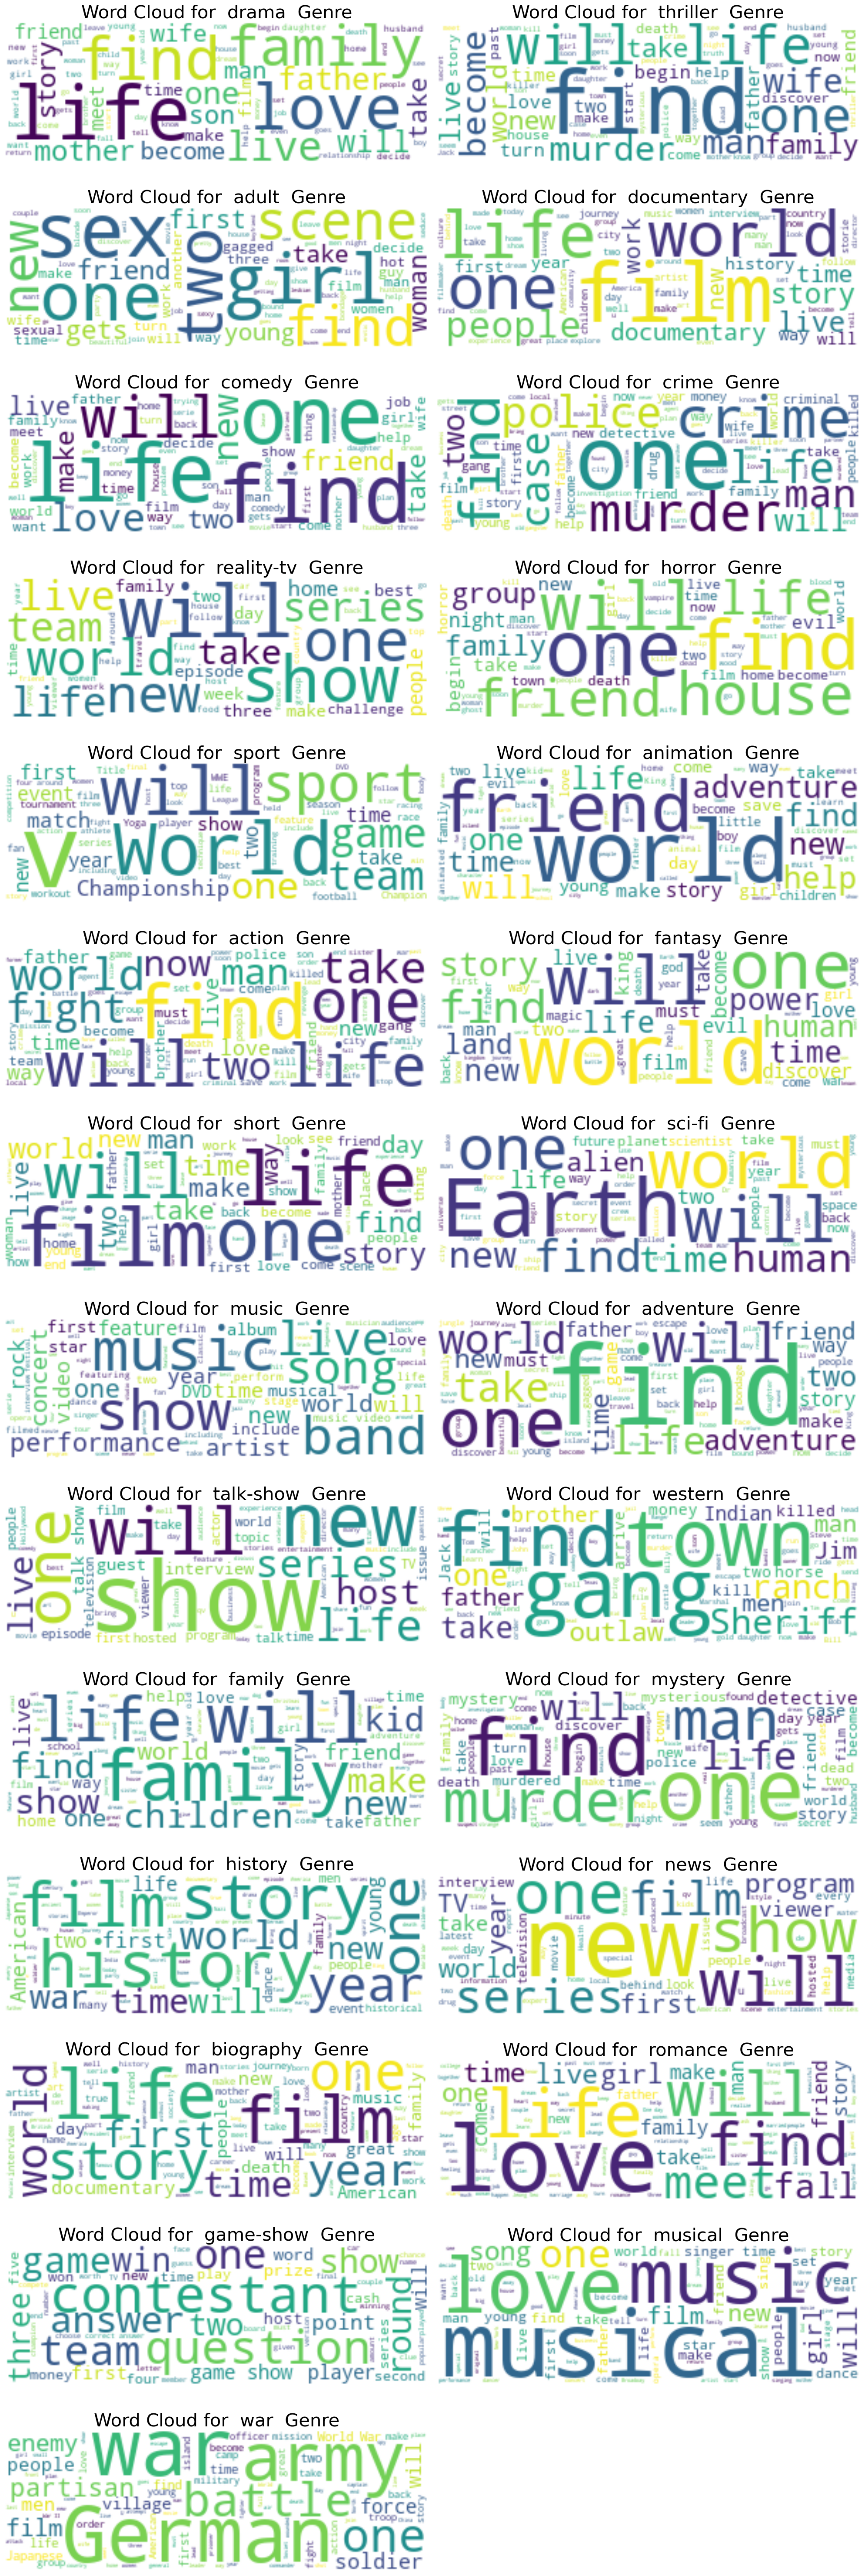

In [28]:
genres = train_df['Genre'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(train_df[train_df["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')

    
plt.tight_layout()
plt.show()

In [29]:
data = train_df.drop(["Title","Id"] , axis = 1) # will drop column 
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

   Labeled_Genre  
0              8  
1             24  
2              1  
3              8  
4              8

In [30]:
x = data["Description"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [31]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Labeled_Genre'] = label_encoder.fit_transform(data['Genre'])
data['Labeled_Genre']

class_names= list(label_encoder.classes_)
class_names  

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.8505183163020622
Model Score on Training data 0.5586379901870365
               precision    recall  f1-score   support

      action        0.35      0.36      0.36       640
       adult        0.39      0.55      0.45       216
   adventure        0.18      0.29      0.23       250
   animation        0.19      0.28      0.22       165
   biography        0.01      0.02      0.01        46
      comedy        0.56      0.52      0.54      3993
       crime        0.08      0.24      0.12        92
 documentary        0.76      0.71      0.73      7017
       drama        0.68      0.57      0.62      8182
      family        0.17      0.32      0.23       214
     fantasy        0.09      0.23      0.13        64
   game-show        0.62      0.69      0.65        86
     history        0.04      0.09      0.06        57
      horror        0.63      0.61      0.62      1119
       music        0.50      0.56      0.53       330
     musical        0.1

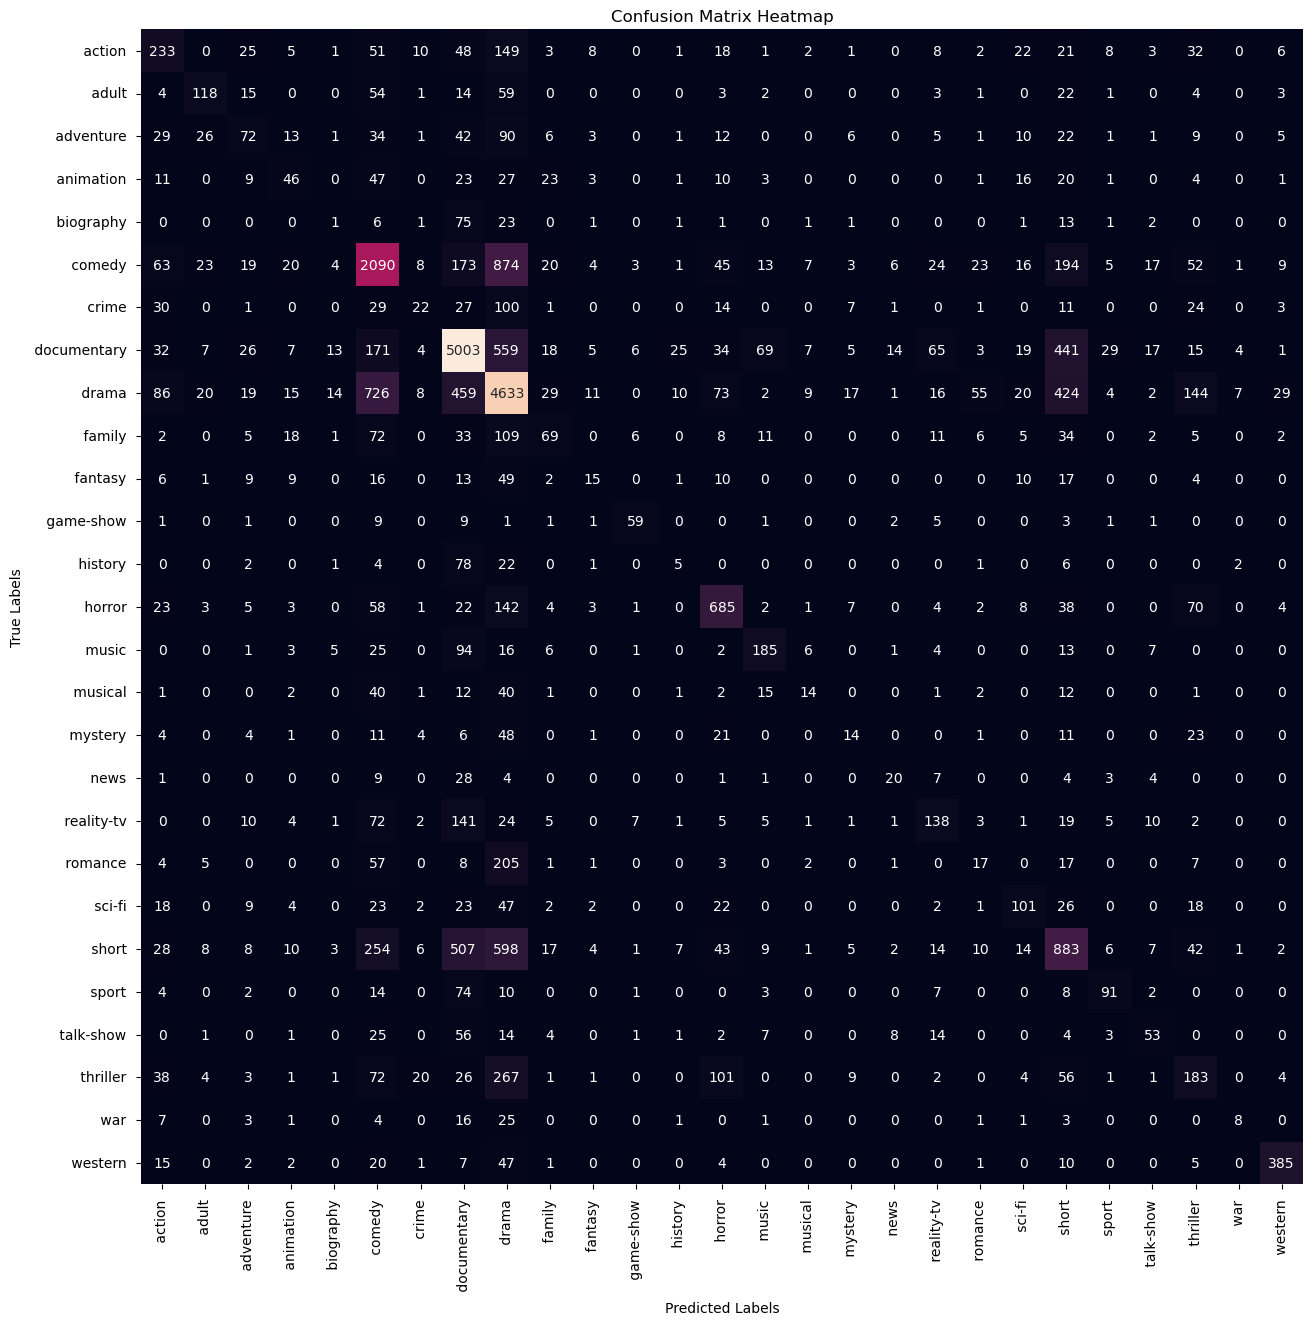

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.6438558305972627
Model Score on Training data 0.5148116722617774


/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.47      0.02        15
       adult        0.03      0.71      0.06        14
   adventure        0.03      0.91      0.05        11
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.44      0.47      0.46      3463
       crime        0.00      0.00      0.00         0
 documentary        0.88      0.59      0.70      9862
       drama        0.82      0.45      0.58     12471
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.11      1.00      0.19        10
     history        0.00      0.00      0.00         0
      horror        0.25      0.75      0.38       365
       music        0.15      0.87      0.25        63
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

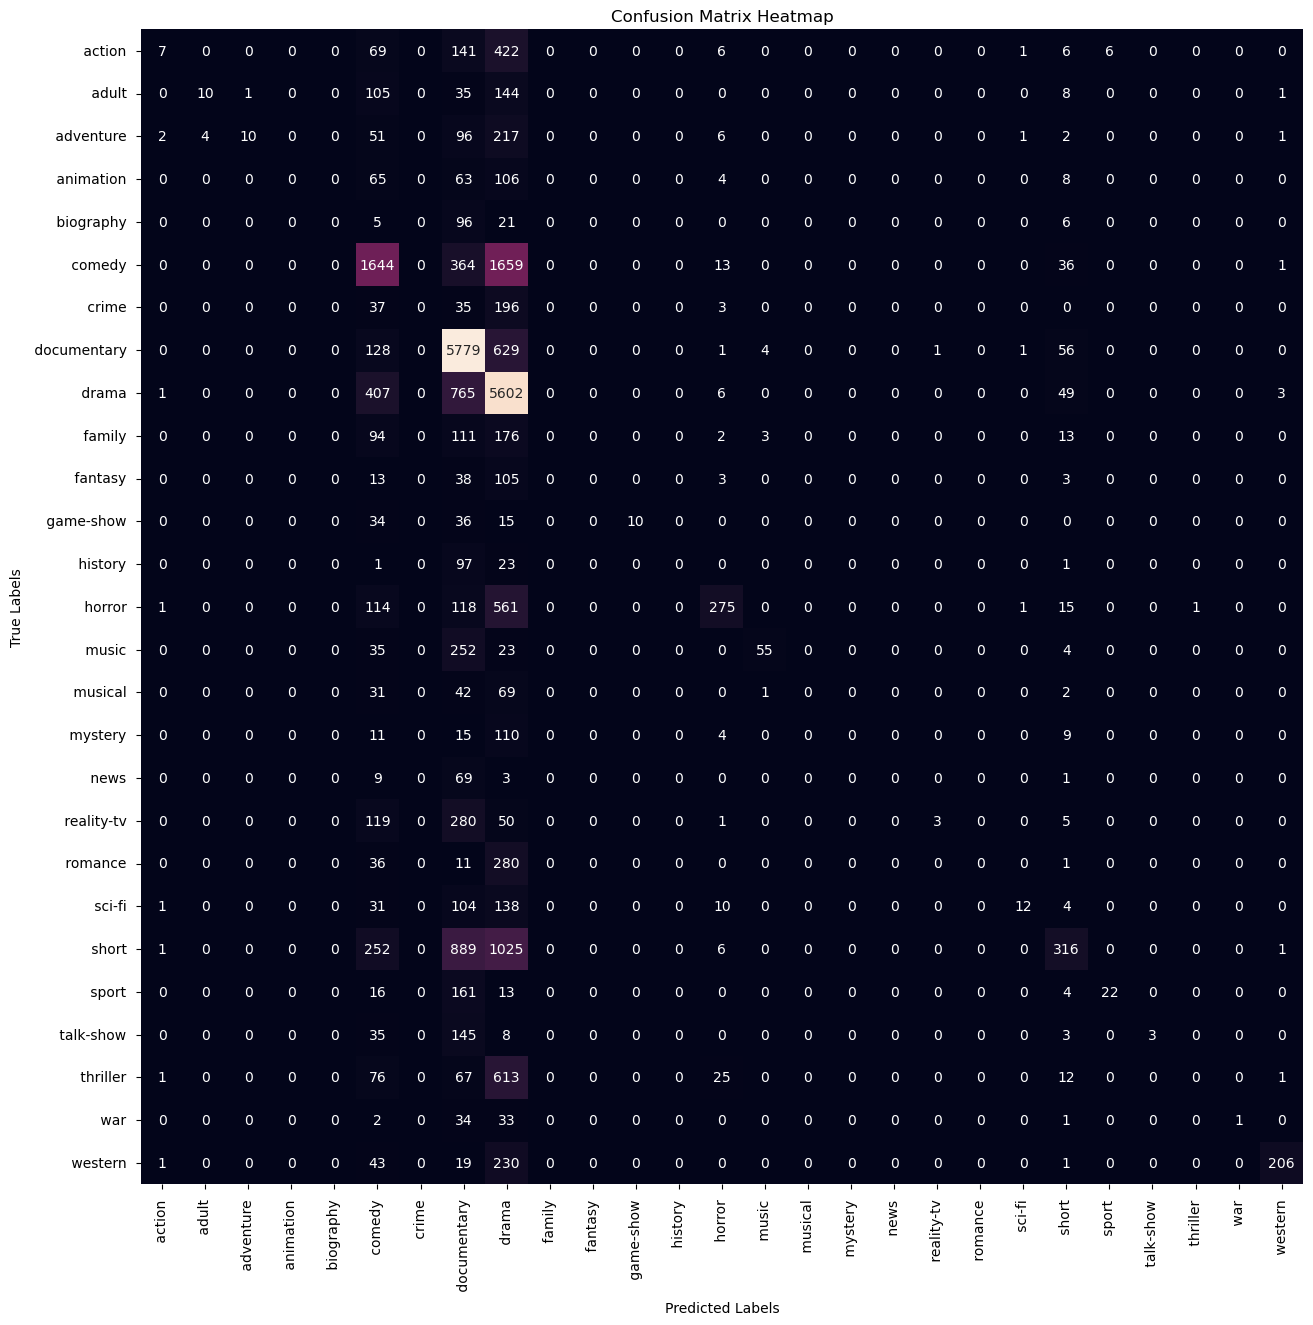

In [38]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))
## As we can see from accuracy that the model the not performing well



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest - Train Score: 0.9996310915999558
Random Forest - Test Score: 0.46305382373556647


/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      1.00      0.01         4
       adult        0.01      1.00      0.01         2
   adventure        0.02      0.89      0.04         9
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.18      0.57      0.28      1205
       crime        0.01      1.00      0.01         2
 documentary        0.89      0.52      0.66     11238
       drama        0.84      0.40      0.54     14328
      family        0.01      1.00      0.02         4
     fantasy        0.00      0.00      0.00         2
   game-show        0.08      0.89      0.15         9
     history        0.00      0.00      0.00         0
      horror        0.02      0.76      0.05        34
       music        0.04      0.88      0.07        16
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

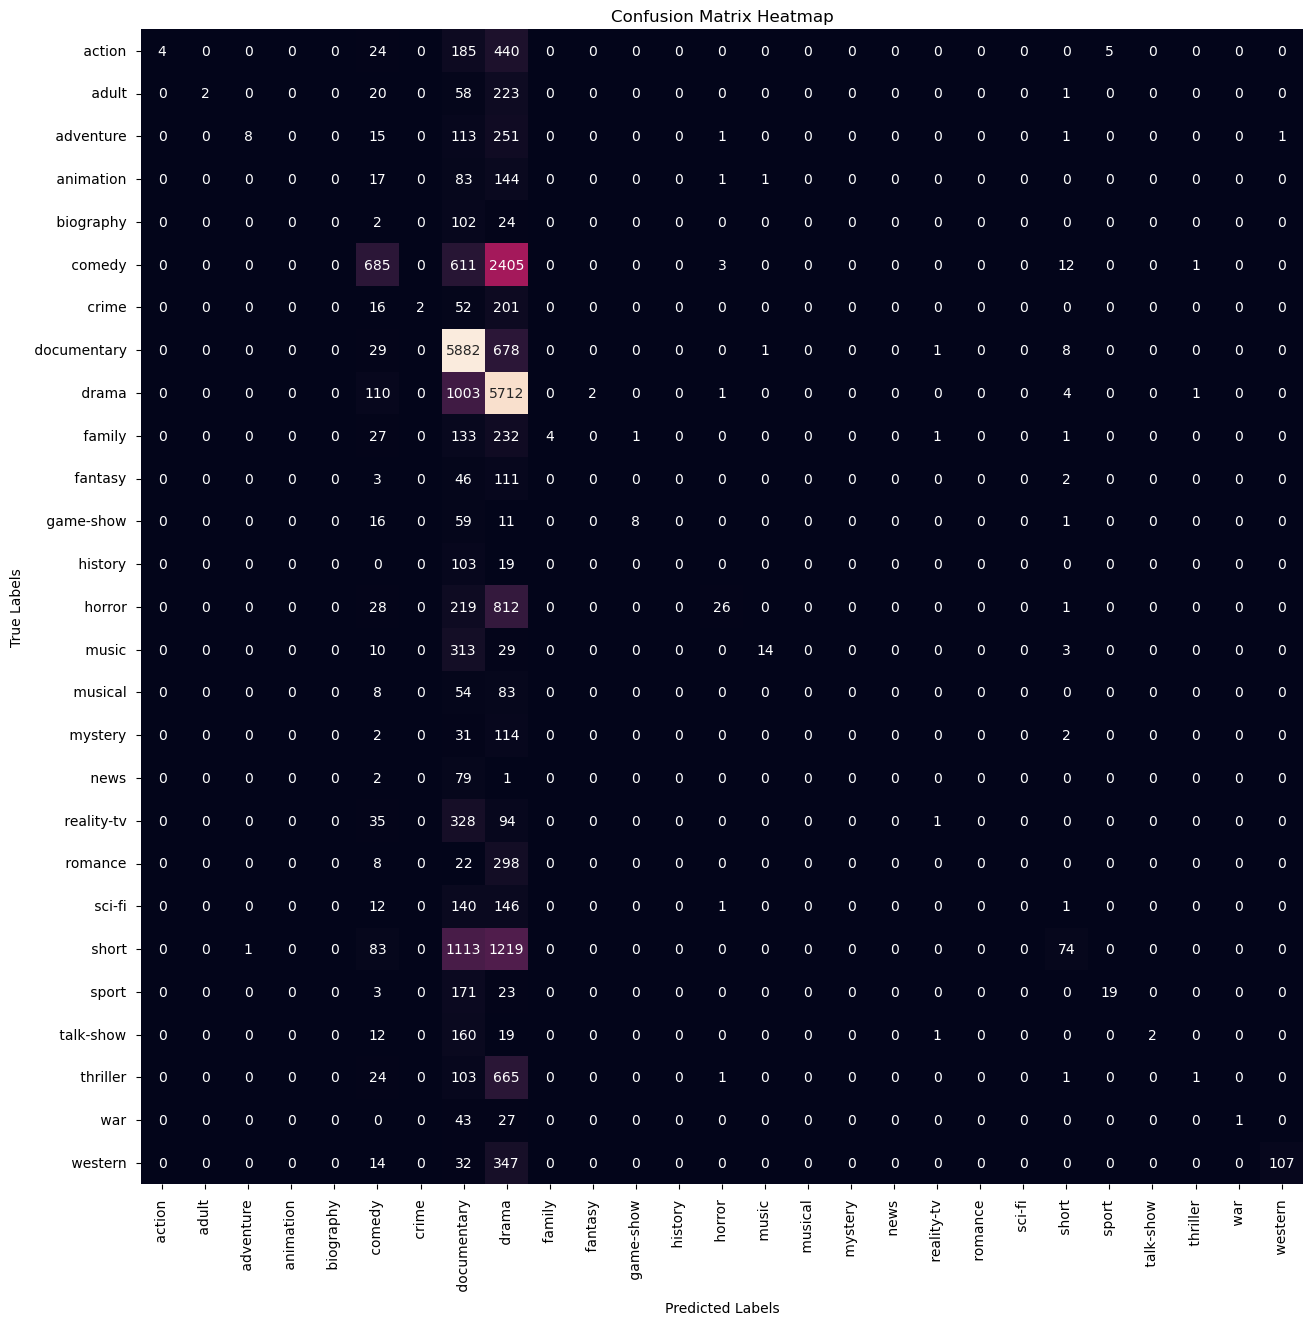

In [39]:
from sklearn.ensemble import RandomForestClassifier 
random_forest = RandomForestClassifier()

# Fit the model with GridSearchCV
random_forest.fit(x_train1, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))

y_pred = random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()